# **Working memory training**: DMN, FPN temporal expansion

Karolina Finc | Centre for Modern Interdisciplinary Technologies, Nicolaus Copernicus University in Toruń, Poland

**Last edited:** 04-10-2018

Step 0: Setup
------------------

In [4]:
# Loading packages
library(psych)
library(tidyverse)
library(data.table)
library(nlme)
library(broom)

#customizing theme for plotting
theme_training <- theme_bw() + theme(axis.text.y = element_text(size=25, colour='#262626ff'),
          axis.text.x = element_text(size=25, colour='#262626ff'),
          axis.title.y = element_text(size=25, colour='#262626ff'),
          axis.title.x  = element_text(size=25, colour='#262626ff'),
          plot.title = element_text(hjust=0.5, size=25),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour="#262626ff"),
          panel.border = element_rect(colour = "#262626ff", fill=NA, size=1.8),
          panel.background = element_rect(fill="transparent",colour=NA),
          plot.background = element_rect(fill="transparent",colour=NA),
          legend.key = element_rect(fill= "transparent", colour="transparent"),
          strip.background =element_rect(fill="transparent", colour=NA),
          strip.text = element_text(size=25),
          axis.ticks = element_line(colour="#262626ff", size=1, 2),
          axis.ticks.length = unit(.15, "cm"),
          aspect.ratio = 1)


Step 1: Loading data
------------------

In [5]:
setwd("~/Dropbox/Projects/LearningBrain/")
fc_cartography_win = read.csv('data/neuroimaging/03-modularity/dynamic/04-recruitment_integration/Power_integration_recruitment_windows_all_networks.csv')
dualnback_exclude = c('sub-13', 'sub-21', 'sub-23', 'sub-50') # higly motion subjects in one of four sessions

fc_cartography_win$Condition <- NA
fc_cartography_win$Condition[fc_cartography_win$Window %% 2 == 0] <- '2-back'
fc_cartography_win$Condition[fc_cartography_win$Window %% 2 != 0] <- '1-back'

fc_cartography_win$Session <- factor(fc_cartography_win$Session, levels = c('Naive', 'Early', 'Middle', 'Late'))
fc_cartography_win$Group <- factor(fc_cartography_win$Group, levels = c('Experimental', 'Control'))

fc_cartography_win_clean <- fc_cartography_win %>% filter(!(Subject %in% dualnback_exclude))

dmn_win <- fc_cartography_win_clean %>% filter(Network == 'DM')
fpn_win <- fc_cartography_win_clean %>% filter(Network == 'FP')

head(dmn_win)

Subject,Group,Session,Window,Network,AU,CER,CO,DA,DM,FP,MEM,SAL,SOM,SUB,UNC,VA,VIS,Condition
sub-01,Control,Naive,1,DM,0.2601459,0.2828879,0.2789901,0.2763323,0.2935315,0.2697724,0.2745172,0.2732950,0.2954138,0.2547480,0.2815333,0.2741188,0.2785929,1-back
sub-01,Control,Early,1,DM,0.2529178,0.3441810,0.2604803,0.2914263,0.3192449,0.3035724,0.2886552,0.2665230,0.2962611,0.2787268,0.3187746,0.3024904,0.3064294,1-back
sub-01,Control,Middle,1,DM,0.3364987,0.3400000,0.3380542,0.3306426,0.3349108,0.3246483,0.3386552,0.3224042,0.3323103,0.3325332,0.3314717,0.3317050,0.3539488,1-back
sub-01,Control,Late,1,DM,0.2417507,0.2597845,0.2190764,0.2511442,0.2726219,0.2402414,0.2717586,0.2564176,0.2444335,0.2493501,0.2684360,0.2411111,0.2696552,1-back
sub-02,Control,Naive,1,DM,0.2245358,0.2438362,0.2590887,0.2474922,0.2640071,0.2584552,0.2267586,0.2487356,0.2232512,0.2513660,0.2478387,0.2526245,0.2436040,1-back
sub-02,Control,Early,1,DM,0.2799867,0.2514224,0.2600739,0.2015047,0.4075624,0.1977793,0.3226207,0.2091858,0.2719606,0.2713793,0.3475677,0.2470498,0.3594994,1-back


Step 2: Multilevel modelling (DMN fluctuations)
------------------

In [6]:
baseline <- lme(DM ~ 1, random = ~ 1|Subject/Session/Condition, data = dmn_win, method = 'ML',  control = list(opt = "optim"), na.action = na.exclude)
condition <- update(baseline, .~. + Condition)
session <- update(condition, .~. + Session)
group <- update(session, .~. + Group)

condition_session <- update(group, .~. + Condition:Session)
condition_group <- update(condition_session, .~. + Condition:Group)
session_group <- update(condition_group, .~. + Session:Group)
condition_session_group <- update(session_group, .~. + Condition:Session:Group)

anova(baseline, condition, session, group, condition_session, condition_group, session_group, condition_session_group)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
baseline,"lme.formula(fixed = DM ~ 1, data = dmn_win, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",1,5,-6543.803,-6513.204,3276.901,,NA,NA
condition,"lme.formula(fixed = DM ~ Condition, data = dmn_win, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",2,6,-6625.771,-6589.053,3318.886,1 vs 2,83.9683544,5.027583e-20
session,"lme.formula(fixed = DM ~ Condition + Session, data = dmn_win, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",3,9,-6647.866,-6592.788,3332.933,2 vs 3,28.0944462,3.469968e-06
group,"lme.formula(fixed = DM ~ Condition + Session + Group, data = dmn_win, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",4,10,-6650.091,-6588.894,3335.046,3 vs 4,4.2256510,3.981734e-02
condition_session,"lme.formula(fixed = DM ~ Condition + Session + Group + Condition:Session, data = dmn_win, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",5,13,-6646.912,-6567.356,3336.456,4 vs 5,2.8207164,4.201010e-01
condition_group,"lme.formula(fixed = DM ~ Condition + Session + Group + Condition:Session + Condition:Group, data = dmn_win, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",6,14,-6645.613,-6559.937,3336.806,5 vs 6,0.7008318,4.025043e-01
session_group,"lme.formula(fixed = DM ~ Condition + Session + Group + Condition:Session + Condition:Group + Session:Group, data = dmn_win, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",7,17,-6644.131,-6540.096,3339.065,6 vs 7,4.5181644,2.106758e-01
condition_session_group,"lme.formula(fixed = DM ~ Condition + Session + Group + Condition:Session + Condition:Group + Session:Group + Condition:Session:Group, data = dmn_win, random = ~1 | Subject/Session/Condition, method = ""ML"", na.action = na.exclude, control = list(opt = ""optim""))",8,20,-6640.900,-6518.506,3340.450,7 vs 8,2.7695202,4.285420e-01


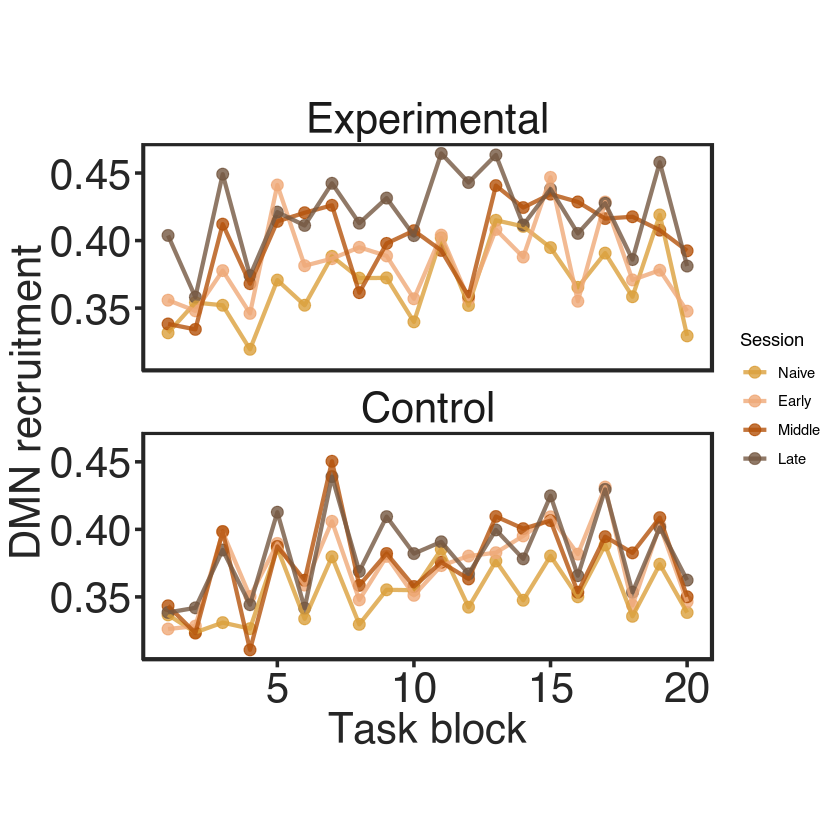

In [5]:
p <- ggplot(dmn_win, aes(x = Window, y = DM, col = Session)) + 
    stat_summary(fun.y = mean, geom = 'point', size = 3, alpha = 0.8) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Session), alpha = 0.8) +
    facet_wrap(~Group, nrow = 2) +
    scale_color_manual(values=c('#daa03d', '#efa978', '#b4530c', '#755841'))+
    ylab('DMN recruitment') +
    theme_training + theme(aspect.ratio = 0.4) + 
    xlab('Task block')
p

ggsave("figures/Figure_DMN_fluctuations.pdf", plot = p, width = 12, height = 9, dpi = 300)  

In [7]:
summary(condition)

Linear mixed-effects model fit by maximum likelihood
 Data: dmn_win 
        AIC       BIC   logLik
  -6625.771 -6589.053 3318.886

Random effects:
 Formula: ~1 | Subject
        (Intercept)
StdDev:  0.02945625

 Formula: ~1 | Session %in% Subject
        (Intercept)
StdDev:  0.03012156

 Formula: ~1 | Condition %in% Session %in% Subject
        (Intercept)   Residual
StdDev:  0.01098533 0.08625189

Fixed effects: DM ~ Condition 
                     Value   Std.Error   DF   t-value p-value
(Intercept)      0.3989055 0.005587896 3024  71.38743       0
Condition2-back -0.0334853 0.003209234  167 -10.43405       0
 Correlation: 
                (Intr)
Condition2-back -0.287

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.2527867 -0.6622123 -0.1943669  0.4414712  4.9199062 

Number of Observations: 3360
Number of Groups: 
                            Subject                Session %in% Subject 
                                 42            

In [15]:
exp1 <- dmn_win %>% filter(Session %in% c('Naive', 'Late')) %>% filter(Group == 'Experimental') %>% filter(Condition == '1-back')
exp2 <- dmn_win %>% filter(Session %in% c('Naive', 'Late')) %>% filter(Group == 'Experimental') %>% filter(Condition == '2-back')
con1 <- dmn_win %>% filter(Session %in% c('Naive', 'Late')) %>% filter(Group == 'Control') %>% filter(Condition == '1-back')
con2 <- dmn_win %>% filter(Session %in% c('Naive', 'Late')) %>% filter(Group == 'Control') %>% filter(Condition == '2-back')

t.test(exp1$DM ~ exp1$Session, paired = TRUE)
t.test(exp2$DM ~ exp1$Session, paired = TRUE)
t.test(con1$DM ~ exp1$Session, paired = TRUE)
t.test(con2$DM ~ exp1$Session, paired = TRUE)


	Paired t-test

data:  exp1$DM by exp1$Session
t = -6.0269, df = 209, p-value = 7.458e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07468128 -0.03786688
sample estimates:
mean of the differences 
            -0.05627408 



	Paired t-test

data:  exp2$DM by exp1$Session
t = -4.9133, df = 209, p-value = 1.806e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06070003 -0.02593816
sample estimates:
mean of the differences 
            -0.04331909 



	Paired t-test

data:  con1$DM by exp1$Session
t = -3.7249, df = 209, p-value = 0.0002514
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05151912 -0.01585957
sample estimates:
mean of the differences 
            -0.03368934 



	Paired t-test

data:  con2$DM by exp1$Session
t = -3.4041, df = 209, p-value = 0.0007956
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.035181254 -0.009377038
sample estimates:
mean of the differences 
            -0.02227915 


In [8]:
dmn_win %>% group_by(Condition) %>% summarize(DM = mean(DM))

Condition,DM
1-back,0.3989055
2-back,0.3654202


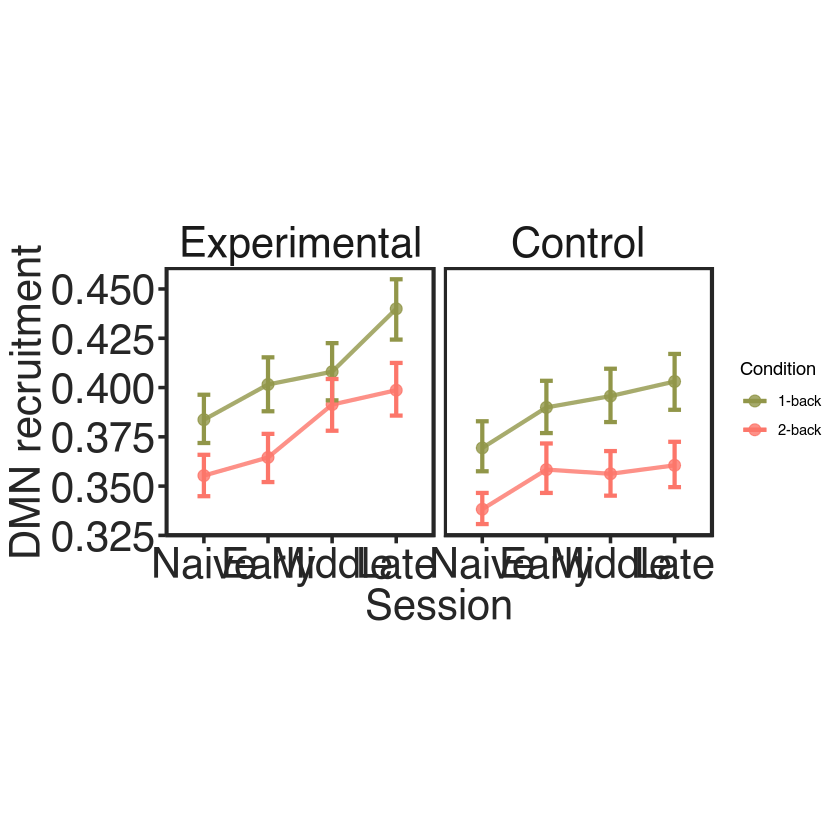

In [9]:
p <- ggplot(dmn_win, aes(x = Session, y = DM, col = Condition)) + 
    stat_summary(fun.y = mean, geom = 'point', size = 3, alpha = 0.8) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Condition), alpha = 0.8) +
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2, size = 1.2) +
    facet_wrap(~Group) +
    scale_colour_manual(values=c('#919649', '#fc766a')) +
    theme_training  + theme(aspect.ratio = 1) + 
    ylab('DMN recruitment')
p

ggsave("figure/Figure_DMN_fluctuations_mean.pdf", plot = p, width = 12, height = 5.5, dpi = 300)  

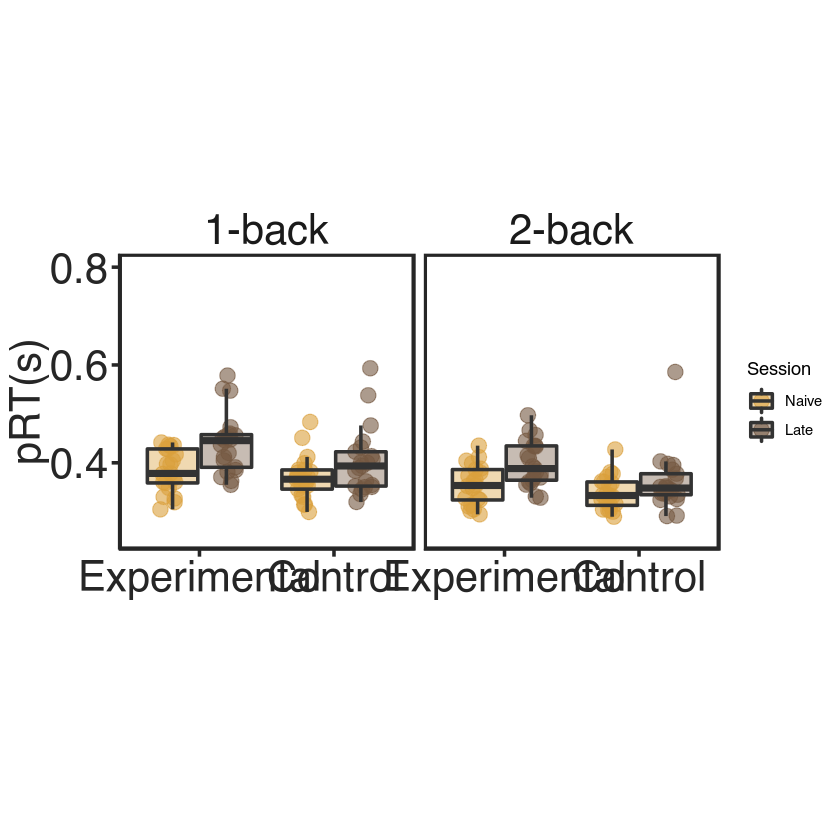

In [13]:
dmn_win %>% filter(Session %in% c('Naive', 'Late')) %>% 
    group_by(Subject, Group, Session, Condition) %>% 
    summarize(DM = mean(DM)) %>%
    ggplot(aes(x = Group, y = DM, fill = Session)) + 
    geom_point(aes(col = Session), position=position_jitterdodge(dodge.width=0.9), alpha = 0.6, size = 4) +
    #geom_jitter(aes(col = Session), alpha = 0.6, size = 4, position=position_dodge(width=0.8)) +
    geom_boxplot(alpha = 0.4, outlier.shape = NA, position=position_dodge(width=0.8), size = 1) + 
    scale_fill_manual(values=c('#daa03d', '#755841')) +
    scale_color_manual(values=c('#daa03d', '#755841')) +
    facet_wrap(~Condition) +
    ylim(0.25, 0.8) +
    ylab('pRT(s)') +
    xlab(' ') +
    theme_training


Step 2: Multilevel modelling (FPN fluctuations)
------------------

In [ ]:
baseline <- lme(FP ~ 1, random = ~ 1|Subject/Session/Condition, data = fpn_win, method = 'ML',  control = list(opt = "optim"), na.action = na.exclude)
condition <- update(baseline, .~. + Condition)
session <- update(condition, .~. + Session)
group <- update(session, .~. + Group)

condition_session <- update(group, .~. + Condition:Session)
condition_group <- update(condition_session, .~. + Condition:Group)
session_group <- update(condition_group, .~. + Session:Group)
condition_session_group <- update(session_group, .~. + Condition:Session:Group)

anova(baseline, condition, session, group, condition_session, condition_group, session_group, condition_session_group)

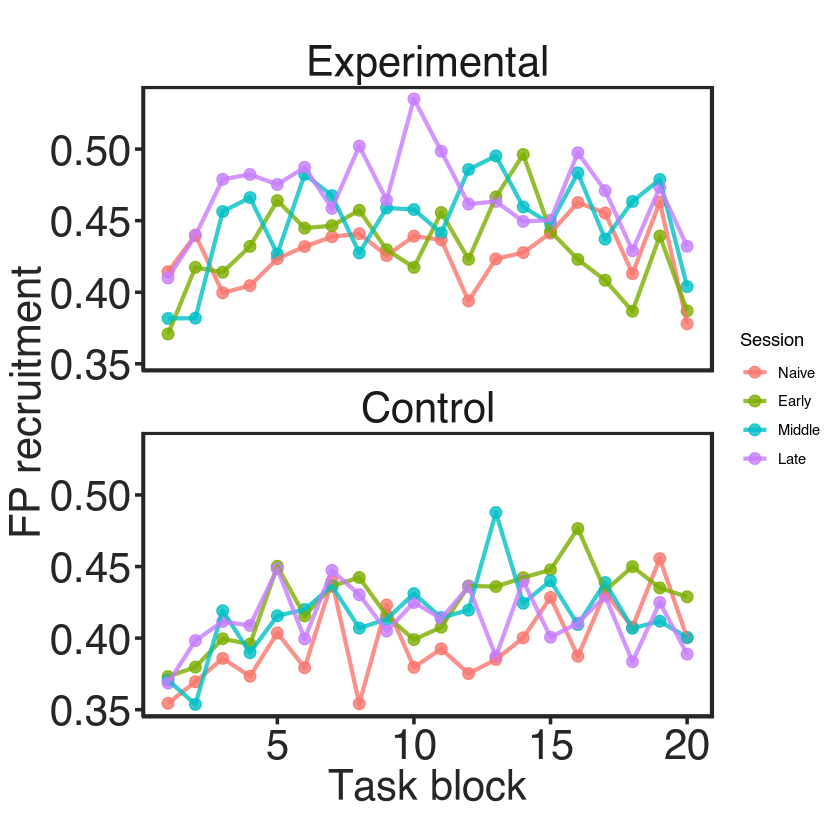

In [7]:
p <- ggplot(fpn_win, aes(x = Window, y = FP, col = Session)) + 
    stat_summary(fun.y = mean, geom = 'point', size = 3, alpha = 0.8) +
    stat_summary(fun.y = mean, geom = 'line', size = 1.2, aes(group = Session), alpha = 0.8) +
    facet_wrap(~Group, nrow = 2) +
    ylab('FP recruitment') +
    theme_training + theme(aspect.ratio = 0.5) + 
    xlab('Task block')
p